In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import time

from IPython.display import display
from sklearn import grid_search
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import ensemble
import scipy.stats
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import chi2
from sklearn.svm import SVR

from sklearn.decomposition import PCA 


C:\Users\sbohan\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\sbohan\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)



Predicting the age of abalone from physical measurements.  The age ofabalone is determined by cutting the shell through the cone, staining it,and counting the number of rings through a microscope -- a boring and time-consuming task.  Other measurements, which are easier to obtain, are used to predict the age.  Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

From the original data examples with missing values were removed (the majority having the predicted value missing), and the ranges of the continuous values have been scaled for use with an ANN (by dividing by 200).

Data comes from an original (non-machine-learning) study:

	Warwick J Nash, Tracy L Sellers, Simon R Talbot, Andrew J Cawthorn and
	Wes B Ford (1994) "The Population Biology of Abalone (_Haliotis_
	species) in Tasmania. I. Blacklip Abalone (_H. rubra_) from the North
	Coast and Islands of Bass Strait", Sea Fisheries Division, Technical
	Report No. 48 (ISSN 1034-3288)



Given is the attribute name, attribute type, the measurement unit and abrief description.  The number of rings is the value to predict. This is a reasonable estimation of age (which is typically 1.5 + the number of rings)

Practical Uses: Age determined by cutting the shell, staining it, and counting the number of rings through a microscope
   - Time-consuming and Pain-staking
   - Requires killing Abalone


# Data Exploration 

In [2]:
fish = pd.read_csv('abalone.csv')

In [3]:
fish.head()

,Sex,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings
0,I,0.315,0.230,0.000,0.1340,0.0575,0.0285,0.3505,6
1,I,0.430,0.340,0.000,0.4280,0.2065,0.0860,0.1150,8
2,I,0.075,0.055,0.010,0.0020,0.0010,0.0005,0.0015,1
3,I,0.165,0.115,0.015,0.0145,0.0055,0.0030,0.0050,4
4,F,0.635,0.495,0.015,1.1565,0.5115,0.3080,0.2885,9


In [4]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex         4177 non-null object
Length      4177 non-null float64
Diameter    4177 non-null float64
Height      4177 non-null float64
Whole       4177 non-null float64
Shucked     4177 non-null float64
Viscera     4177 non-null float64
Shell       4177 non-null float64
Rings       4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
print(fish.describe())
print('\n')
print(fish.Sex.value_counts())
print('\n')
print(fish.Rings.value_counts())

            Length     Diameter       Height        Whole      Shucked  \
count  4177.000000  4177.000000  4177.000000  4177.000000  4177.000000   
mean      0.523992     0.407881     0.139516     0.828742     0.359367   
std       0.120093     0.099240     0.041827     0.490389     0.221963   
min       0.075000     0.055000     0.000000     0.002000     0.001000   
25%       0.450000     0.350000     0.115000     0.441500     0.186000   
50%       0.545000     0.425000     0.140000     0.799500     0.336000   
75%       0.615000     0.480000     0.165000     1.153000     0.502000   
max       0.815000     0.650000     1.130000     2.825500     1.488000   

           Viscera        Shell        Rings  
count  4177.000000  4177.000000  4177.000000  
mean      0.180594     0.238831     9.933684  
std       0.109614     0.139203     3.224169  
min       0.000500     0.001500     1.000000  
25%       0.093500     0.130000     8.000000  
50%       0.171000     0.234000     9.000000  
75% 

In [6]:
fish.describe()

,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [7]:
correlation_matrix = fish.corr()
display(correlation_matrix)

,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


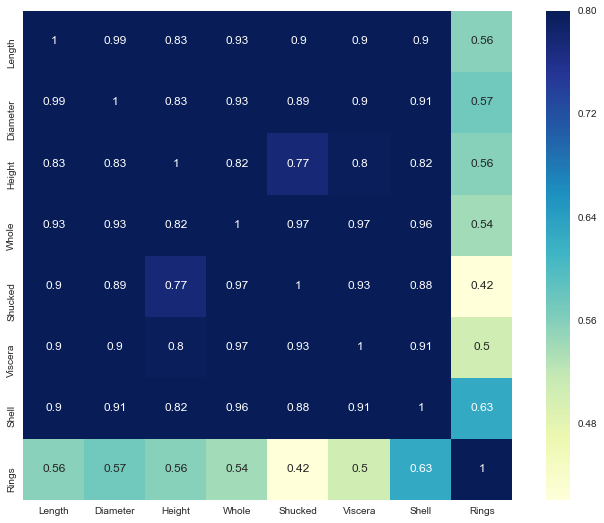

In [8]:
corrmat = fish.corr()
# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8,annot=True, square=True, cmap="YlGnBu")
plt.show()

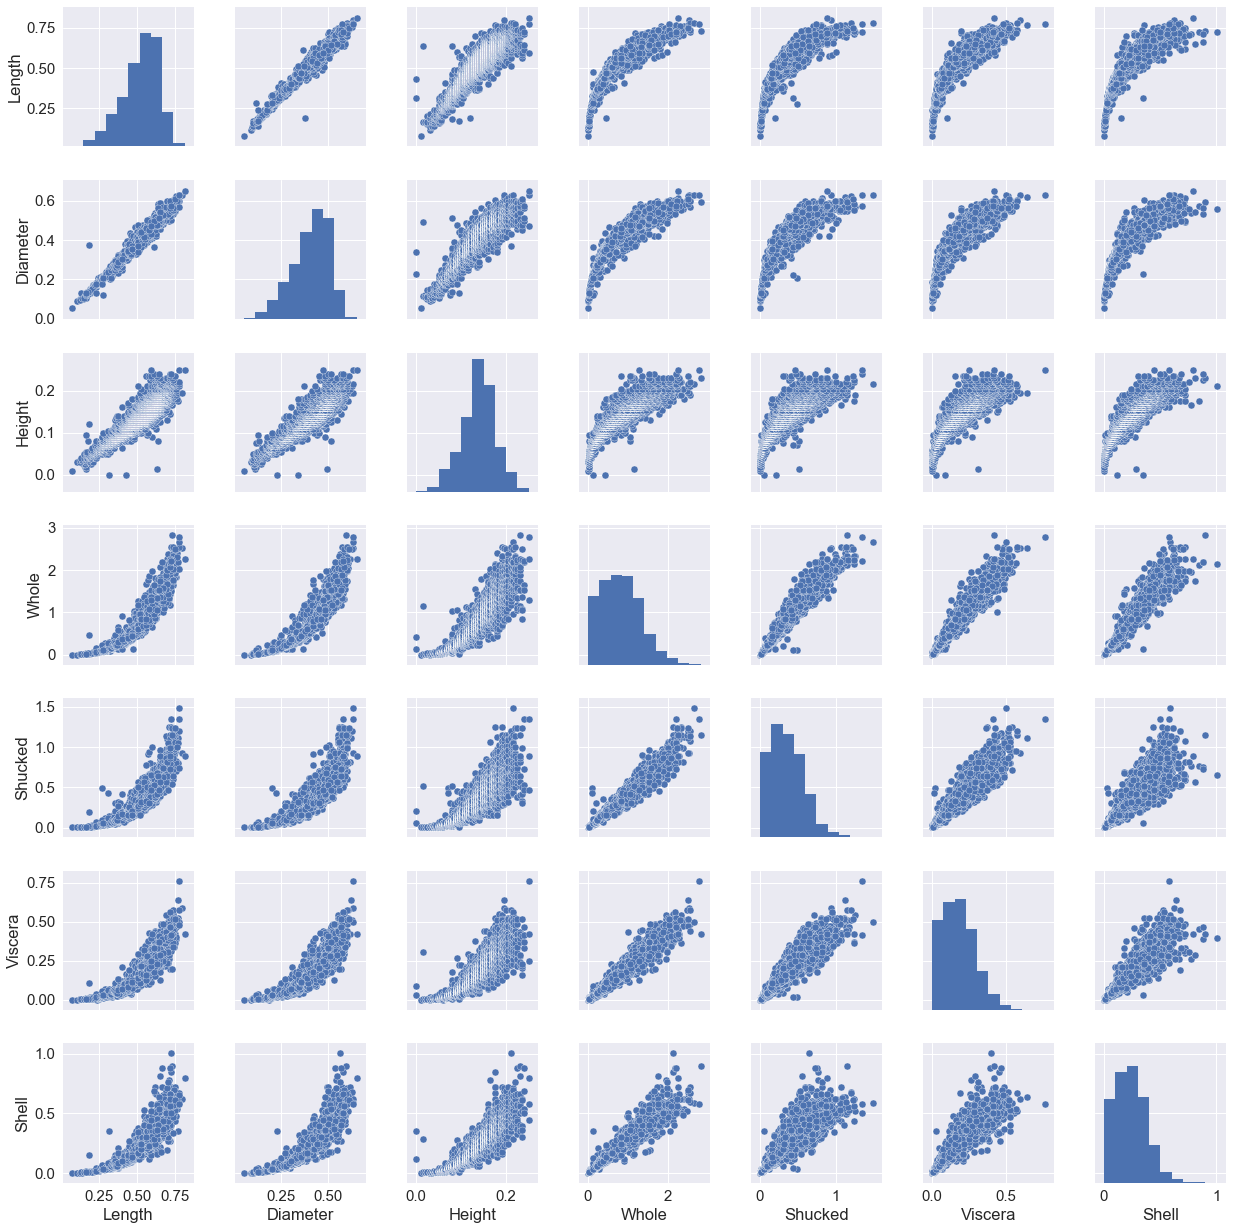

In [73]:
sns.set(font_scale=1.5)
sns.pairplot(fish.iloc[:,0:8])

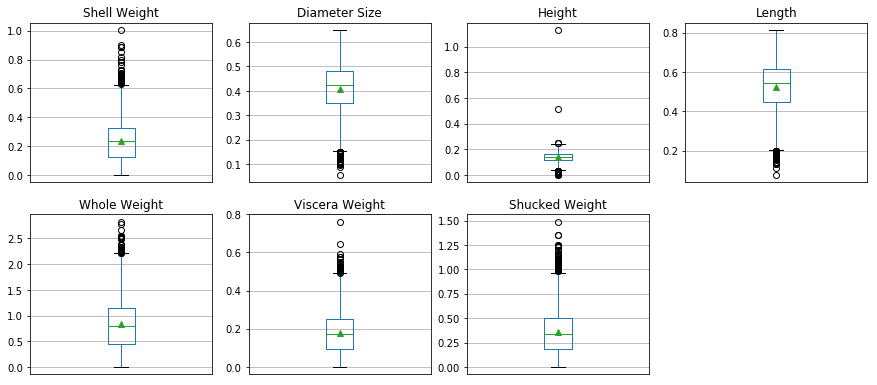

In [6]:

plt.figure(figsize=(15,10))

plt.subplot(3,4, 1)
fish[['Shell']].boxplot(showmeans=True)

plt.xticks([])
plt.title('Shell Weight')

plt.subplot(3,4, 2)
fish[['Diameter']].boxplot(showmeans=True)

plt.xticks([])
plt.title('Diameter Size')

plt.subplot(3,4, 3)
fish[['Height']].boxplot(showmeans=True)

plt.xticks([])
plt.title('Height')

plt.subplot(3,4, 4)
fish[['Length']].boxplot(showmeans=True)

plt.xticks([])
plt.title('Length')

plt.subplot(3,4, 5)
fish[['Whole']].boxplot(showmeans=True)

plt.xticks([])
plt.title('Whole Weight')

plt.subplot(3,4, 6)
fish[['Viscera']].boxplot(showmeans=True)

plt.xticks([])
plt.title('Viscera Weight')

plt.subplot(3,4, 7)
fish[['Shucked']].boxplot(showmeans=True)

plt.xticks([])
plt.title('Shucked Weight')




plt.show()



Looking at my continous variables, there appears to be a linear relationship with my outcome variable, although there seems to be the presence of outliers in each of my variables, affecting the shape of the distribution.  The most apparent outliers seem to be in Height, so let's remove those. 

I also want to check the relationship with my outcome variables, and my categorical variables, Sex. 


In [5]:
#drop outliers from height
fish = fish.loc[fish.Height < 0.5,:]

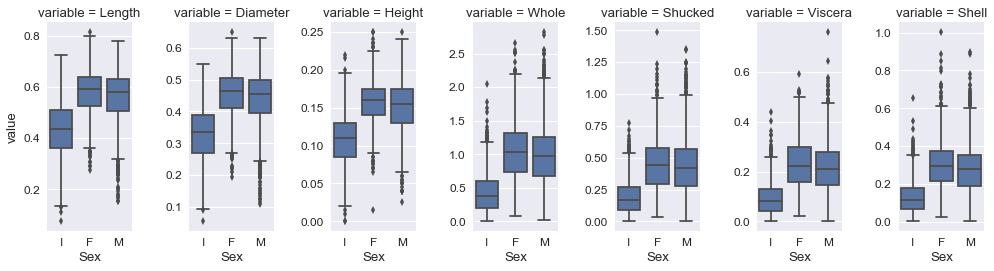

In [10]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.2)

df_long = fish.iloc[:,0:8]
df_long = pd.melt(df_long, id_vars=['Sex'])

g = sns.FacetGrid(df_long, col="variable", size=4, aspect=.5, sharey=False)
g = g.map(sns.boxplot, "Sex", "value")
plt.show()


In [11]:
corrmat = fish.corr()

corrmat['Rings'].sort_values(ascending=False)

Rings       1.000000
Shell       0.627815
Height      0.609634
Diameter    0.574792
Length      0.556827
Whole       0.540859
Viscera     0.504234
Shucked     0.421442
Name: Rings, dtype: float64

OK, my variables seems to have a reasonably high correlation with Rings, however, there appears to be the presence of multicollinearity at play among my features, that I will likely want to address. 

Before we begin modeling, I want to caclculate a baseline score, in this case RMSE, to compare my models' performance to. 
I also want to see how the model performs, before I do any feature engineering. 

In [6]:
#find baseline score - RMSE
targets= np.array(fish.Rings)
predictions = targets.copy().astype(float)
predictions[:] = np.mean(fish['Rings'])
RMSE = np.mean((targets-predictions)**2)**0.5
print('\n RMSE: {:.3f}'.format(RMSE))


 RMSE: 3.224


In [7]:
#find baseline accuracy
baseline_accuracy = fish.loc[fish['Rings']==9,'Rings'].value_counts().sum()/fish['Rings'].value_counts().sum()
print('baseline_accuracy: {:.3f}'.format(baseline_accuracy))

baseline_accuracy: 0.165


# Modeling Take 1 - Baseline

In [8]:
dummies = pd.get_dummies(fish['Sex'])

In [9]:
features = pd.concat([dummies, fish], axis =1, join_axes=[dummies.index])
feats = features.drop(['Sex','Rings'],1)

In [10]:
#independent
X = feats
# Dependent variable
Y = features['Rings']

## Linear 

In [11]:
#create train test split
X_train, X_test, Y_train, Y_test =model_selection.train_test_split(X,Y, test_size=0.30, random_state=42) 

#scale
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train, Y_train)

X_scaled_test  = scaler.transform(X_test)

#instantiate and fit model
regr = linear_model.LinearRegression()
regr.fit(X_scaled_train, Y_train)

#make predictions
Y_pred = regr.predict(X_scaled_test)

print('\nThe R2 for train set: {:.3f}'.format(regr.score(X_scaled_train, Y_train)))
print('The R2 for test set: {:.3f}'.format(regr.score(X_scaled_test, Y_test)))


The R2 for train set: 0.525
The R2 for test set: 0.584


In [12]:
#create train test split using k fold 
kf = model_selection.KFold(n_splits =5, shuffle= True)

In [13]:
#variance explained - R2
predictions_linear = cross_val_predict(regr, X, Y, cv=kf)

r2_linear = r2_score(Y,predictions_linear)
print('Cross Val Predict R2: {:.3F}'.format(r2_linear))

#Calculate RMSE
actual_linear = Y

mse_linear = mean_squared_error(actual_linear, predictions_linear)
rmse_linear = np.sqrt(mse_linear)
print('RMSE: {:.3f}'.format(rmse_linear))

Cross Val Predict R2: 0.540
RMSE: 2.186


In [14]:
#lets try adjusting number of kfold splits
kf2 = model_selection.KFold(n_splits =10, shuffle= True)

In [15]:
#variance explained - R2
predictions_linear = cross_val_predict(regr, X, Y, cv=kf2)

r2_linear = r2_score(Y,predictions_linear)
print('Cross Val Predict R2: {:.3F}'.format(r2_linear))

#Calculate RMSE
actual_linear = Y

mse_linear = mean_squared_error(actual_linear, predictions_linear)
rmse_linear = np.sqrt(mse_linear)
print('RMSE: {:.3f}'.format(rmse_linear))

Cross Val Predict R2: 0.541
RMSE: 2.185


## Random Forrest

In [16]:
#instantiate and fit model
rfr = ensemble.RandomForestRegressor()
rfr.fit(X_scaled_train, Y_train)

print("\nR2 on training set: {:.3f}".format(rfr.score(X_scaled_train, Y_train)))
print("\nR2 on test set: {:.3f}".format(rfr.score(X_scaled_test, Y_test)))



R2 on training set: 0.909

R2 on test set: 0.527


In [17]:
predictions_rfr = cross_val_predict(rfr, X, Y, cv=kf)

r2_rfr = r2_score(Y,predictions_rfr)
print('Cross Val Predict R2: {:.3F}'.format(r2_rfr))

actual_rfr = Y

mse_rfr = mean_squared_error(actual_rfr, predictions_rfr)
rmse_rfr = np.sqrt(mse_rfr)
print('RMSE: {:.3f}'.format(rmse_rfr))

Cross Val Predict R2: 0.504
RMSE: 2.272


Lower R2 score from train test split and cross val predict than linear model, and a higher RMSE, albeat still lower than our baseline RMSE. Also, there appears to be some overfitting going on, based on the train group R2. 

Let's tune the model to see if we can improve our test score accuracy.Going to start by changing the number of kfold splits. 
Will then try grid search to find the best params. 

In [18]:
predictions_rfr = cross_val_predict(rfr, X, Y, cv=kf2)

r2_rfr = r2_score(Y,predictions_rfr)
print('Cross Val Predict R2: {:.3F}'.format(r2_rfr))

actual_rfr = Y

mse_rfr = mean_squared_error(actual_rfr, predictions_rfr)
rmse_rfr = np.sqrt(mse_rfr)
print('RMSE: {:.3f}'.format(rmse_rfr))

Cross Val Predict R2: 0.510
RMSE: 2.256


In [68]:
#going to try something with grid search

param_search = [{'n_estimators': [200,300, 400, 500],
          'max_depth': [5,6,8,10],
          'min_samples_split':[2,3,5,6]}]


# Initialize and fit the model.
rfr_grid = GridSearchCV(ensemble.RandomForestRegressor(), param_grid=param_search,cv=kf2)

rfr_grid.fit(X_scaled_train,Y_train)

print('Best Score: ', rfr_grid.best_score_)
print('Best Parameters: ', rfr_grid.best_params_)

Best Score:  0.53725714517
Best Parameters:  {'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 400}


In [19]:
#instantiate and fit model
rfr = ensemble.RandomForestRegressor(n_estimators =200, max_depth=8, min_samples_split =6)
rfr.fit(X_scaled_train, Y_train)

print("\nR2 on training set: {:.3f}".format(rfr.score(X_scaled_train, Y_train)))
print("R2 on test set: {:.3f}".format(rfr.score(X_scaled_test, Y_test)))

predictions_rfr = cross_val_predict(rfr, X, Y, cv=kf2)

r2_rfr = r2_score(Y,predictions_rfr)
print('Cross Val Predict R2: {:.3f}'.format(r2_rfr))

# Calculate RMSE
actual_rfr = Y

mse_rfr = mean_squared_error(actual_rfr, predictions_rfr)
rmse_rfr = np.sqrt(mse_rfr)
print('RMSE: {:.3f}'.format(rmse_rfr))



R2 on training set: 0.743
R2 on test set: 0.570
Cross Val Predict R2: 0.551
RMSE: 2.160


## Ridge

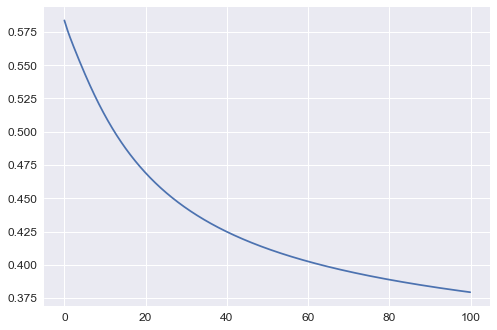

In [26]:
my_alpha = []
my_accuracy = []
for alph in np.arange(0.01,100,.1):
    ridgeregr =linear_model.Ridge(alpha=alph)
    X_train, X_test, Y_train, Y_test =model_selection.train_test_split(X,Y, test_size=0.30, random_state=42) 
    ridgeregr.fit(X_train, Y_train) 
    my_alpha.append(alph)
    my_accuracy.append(ridgeregr.score(X_test,Y_test))

plt.plot(my_alpha, my_accuracy)
plt.show()

In [27]:
scores = pd.DataFrame({"ridge_score": my_accuracy,"alpha":my_alpha})
scores['ridge_score'].argmax()

0

In [28]:
scores.iloc[0]

alpha          0.01000
ridge_score    0.58363
Name: 0, dtype: float64

In [29]:
ridgeregr =linear_model.Ridge(alpha=0.01)
# Fit the variables to the logistic model.
ridgeregr.fit(X_scaled_train, Y_train)

print('\nR2 for train set: {:.3f}'.format(ridgeregr.score(X_scaled_train, Y_train)))
print('R2 for test set: {:.3f} '.format(ridgeregr.score(X_scaled_test, Y_test)))

predictions_ridge = cross_val_predict(ridgeregr, X, Y, cv=kf2)

r2_ridgeregr = r2_score(Y,predictions_ridge)
print('Cross Val Predict R2: {:.3f}'.format(r2_ridgeregr))

# Calculate RMSE
actual_ridge = Y

mse_ridge = mean_squared_error(actual_ridge, predictions_ridge)
rmse_ridge = np.sqrt(mse_ridge)
print('RMSE: {:.3f}'.format(rmse_ridge))


R2 for train set: 0.525
R2 for test set: 0.584 
Cross Val Predict R2: 0.540
RMSE: 2.187


As expected our Ridge model performs about as well, if not a little better than our linear model. Let's try an KNN regressor as well. 

## KNN


In [37]:
# Fit the model.

knn_params = {'n_neighbors':[2, 4, 6, 8, 10]}
knn_grid = GridSearchCV(KNeighborsRegressor(), knn_params, cv=kf2)
knn_grid.fit(X_scaled_train, Y_train)

print('Best Score: ', knn_grid.best_score_)
print('Best Parameters: ', knn_grid.best_params_)


Best Score:  0.499555352374
Best Parameters:  {'n_neighbors': 10}


In [30]:
# Fit the model.
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_scaled_train, Y_train)


print('\nR2 for train set: {:.3f}'.format(knn.score(X_scaled_train, Y_train)))
print('R2 for test set: {:.3f}'.format(knn.score(X_scaled_test, Y_test)))

predictions_knn = cross_val_predict(knn, X, Y, cv=kf2)

r2_knn = r2_score(Y,predictions_knn)
print('Cross Val Predict R2: {:.3f}'.format(r2_knn))

# Calculate RMSE
actual_knn = Y

mse_knn = mean_squared_error(actual_knn, predictions_knn)
rmse_knn = np.sqrt(mse_knn)
print('RMSE: {:.3f}'.format(rmse_knn))


R2 for train set: 0.599
R2 for test set: 0.528
Cross Val Predict R2: 0.535
RMSE: 2.200


## Gradient Boost

In [20]:
# Fit the model.
params = {'n_estimators': 200,
          'max_depth':4,
          'learning_rate': .05}

gbr = ensemble.GradientBoostingRegressor(**params)
gbr.fit(X_scaled_train, Y_train)


print('\nR2 for train set: {:.3f}'.format(gbr.score(X_scaled_train, Y_train)))
print('R2 for test set: {:.3f}'.format(gbr.score(X_scaled_test, Y_test)))

predictions_gbr = cross_val_predict(gbr, X, Y, cv=kf2)

r2_gbr = r2_score(Y,predictions_gbr)
print('Cross Val Predict R2: {:.3f}'.format(r2_gbr))

# Calculate RMSE
actual_gbr = Y

mse_gbr = mean_squared_error(actual_gbr, predictions_gbr)
rmse_gbr = np.sqrt(mse_gbr)
print('RMSE: {:.3f}'.format(rmse_gbr))


R2 for train set: 0.728
R2 for test set: 0.571
Cross Val Predict R2: 0.549
RMSE: 2.166


In [69]:
param_search = [{'n_estimators': [200,300, 400, 500],
          'max_depth': [3,4,5,6],
          'learning_rate': [0.05, .1, 0.2, 0.3]}]

# Initialize and fit the model.
gbr_grid = GridSearchCV(ensemble.GradientBoostingRegressor(), param_grid=param_search,cv=kf2)

gbr_grid.fit(X_scaled_train,Y_train)

print('Best Score: ', gbr_grid.best_score_)
print('Best Parameters: ', gbr_grid.best_params_)

Best Score:  0.528338766394
Best Parameters:  {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}


In [21]:
# Fit the model.
params = {'n_estimators': 200,
          'max_depth':3,
          'learning_rate': .05}


gbr = ensemble.GradientBoostingRegressor(**params)
gbr.fit(X_scaled_train, Y_train)


print('\nR2 for train set: {:.3f}'.format(gbr.score(X_scaled_train, Y_train)))
print('R2 for test set: {:.3f}'.format(gbr.score(X_scaled_test, Y_test)))

predictions_gbr = cross_val_predict(gbr, X, Y, cv=kf2)

r2_gbr = r2_score(Y,predictions_gbr)
print('Cross Val Predict R2: {:.3f}'.format(r2_gbr))

# Calculate RMSE
actual_gbr = Y

mse_gbr = mean_squared_error(actual_gbr, predictions_gbr)
rmse_gbr = np.sqrt(mse_gbr)
print('RMSE: {:.3f}'.format(rmse_gbr))


R2 for train set: 0.657
R2 for test set: 0.572
Cross Val Predict R2: 0.551
RMSE: 2.159


OK, so our gradient boost is performing almost as well as our linear and random forest models (slightly better than RF). Let's try one more. 

## SVM

In [ ]:
param_search = [{'C': [1,20,50,100,200,400],
          'epsilon': [0.1,0.5,1,5,10],
          'kernel':['rbf','linear','poly']}]

# Initialize and fit the model.
svr_grid = GridSearchCV(SVR(), param_grid=param_search,cv=kf2)

svr_grid.fit(X_scaled_train,Y_train)

print('Best Score: ', svr_grid.best_score_)
print('Best Parameters: ', svr_grid.best_params_)



In [22]:
# Fit the model.
svr = SVR(C = 50, epsilon = 1 )
svr.fit(X_scaled_train, Y_train)

print('\nR2 for train set: {:.3f}'.format(svr.score(X_scaled_train, Y_train)))
print('R2 for test set: {:.3f}'.format(svr.score(X_scaled_test, Y_test)))

predictions_svr = cross_val_predict(svr, X, Y, cv=kf2)

r2_svr = r2_score(Y,predictions_svr)
print('Cross Val Predict R2: {:.3f}'.format(r2_svr))

# Calculate RMSE
actual_svr= Y

mse_svr = mean_squared_error(actual_svr, predictions_svr)
rmse_svr= np.sqrt(mse_svr)
print('RMSE: {:.3f}'.format(rmse_svr))


R2 for train set: 0.604
R2 for test set: 0.603
Cross Val Predict R2: 0.554
RMSE: 2.154


In [35]:
lin_train_set_r2 = regr.score(X_scaled_train, Y_train)
lin_test_set_r2 = regr.score(X_scaled_test, Y_test)

rfr_train_set_r2 = rfr.score(X_scaled_train, Y_train)
rfr_test_set_r2 = rfr.score(X_scaled_test, Y_test)

ridgeregr_train_set_r2 = ridgeregr.score(X_scaled_train, Y_train)
ridgeregr_test_set_r2 = ridgeregr.score(X_scaled_test, Y_test)

knn_train_set_r2 = knn.score(X_scaled_train, Y_train)
knn_test_set_r2 = knn.score(X_scaled_test, Y_test)

gbr_train_set_r2 =gbr.score(X_scaled_train, Y_train)
gbr_test_set_r2 = gbr.score(X_scaled_test, Y_test)

svr_train_set_r2 =svr.score(X_scaled_train, Y_train)
svr_test_set_r2 = svr.score(X_scaled_test, Y_test)

In [36]:

data1 = {'Model':['Linear','Random Forest','Ridge','KNN','Gradient Boost',' SVR'],\
         'Train Set R2': [lin_train_set_r2,rfr_train_set_r2,ridgeregr_train_set_r2, knn_train_set_r2, gbr_train_set_r2,svr_train_set_r2], \
         'Test Set R2':[lin_test_set_r2 ,rfr_test_set_r2,ridgeregr_test_set_r2, knn_test_set_r2,gbr_test_set_r2,svr_test_set_r2 ] ,\
         'Cross Val Predict R2':[r2_linear, r2_rfr, r2_ridgeregr, r2_knn, r2_gbr, r2_svr],\
         'RMSE':[rmse_linear,rmse_rfr, rmse_ridge, rmse_knn, rmse_gbr, rmse_svr]}
results = pd.DataFrame(data = data1)
results = results.set_index('Model')
results = results.round(3)

In [37]:
results

,Cross Val Predict R2,RMSE,Test Set R2,Train Set R2
Model,,,,
Linear,0.540,2.188,0.584,0.525
Random Forest,0.554,2.153,0.574,0.742
Ridge,0.540,2.187,0.584,0.525
KNN,0.535,2.200,0.528,0.599
Gradient Boost,0.550,2.163,0.572,0.657
SVR,0.554,2.154,0.603,0.604


In [230]:
results.to_csv('results.csv')

Overall, my linear, RF, Gradient Boosting and SVM models perform fairly close to each other, all of which improve upon the baseline RMSE. The SVM model does appear to perform best.  But let's see if we can try and improve our models' accuracies. 

# Feature engineering

In [29]:
corrmat = features.corr()

corrmat['Rings'].sort_values(ascending=False)

Rings       1.000000
Shell       0.627574
Diameter    0.574660
Height      0.557467
Length      0.556720
Whole       0.540390
Viscera     0.503819
Shucked     0.420884
F           0.250279
M           0.181831
I          -0.436063
Name: Rings, dtype: float64

OK. Now let's look at the shape of the distributions of my continuous variables, with histograms and QQ plots. 
Next, I want to see if transforming any of my features, will help the performance of my models. 

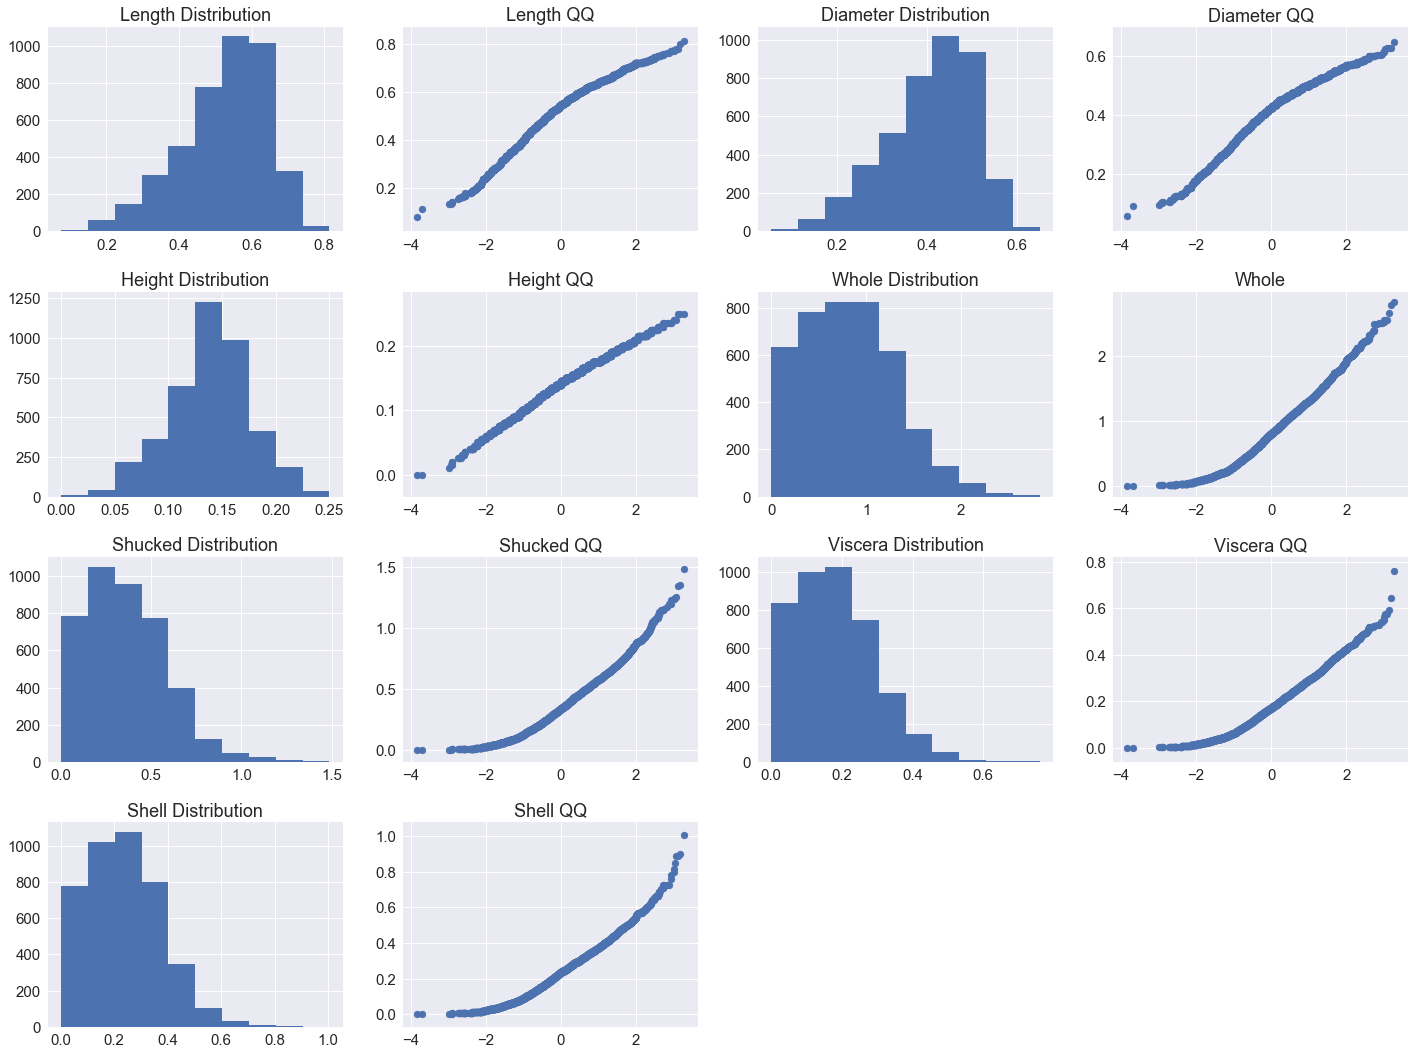

In [54]:
#I want to understand the distribtions of my continuous variables with histograms and qq plots
f,ax = plt.subplots(figsize=(20,15))

norm= sorted(np.random.normal(0, 1, 4175))

plt.subplot(4,4, 1)
plt.hist(fish['Length'])

plt.title("Length Distribution")

plt.subplot(4,4, 2)
plt.scatter(norm, sorted(fish['Length']))
plt.title("Length QQ")

plt.subplot(4,4, 3)
plt.hist(fish['Diameter'])
plt.title("Diameter Distribution")

plt.subplot(4,4, 4)
plt.scatter(norm, sorted(fish['Diameter']))
plt.title("Diameter QQ")

plt.subplot(4,4, 5)
plt.hist(fish['Height'])
plt.title("Height Distribution")

plt.subplot(4,4, 6)
plt.scatter(norm, sorted(fish['Height']))
plt.title("Height QQ")

plt.subplot(4,4, 7)
plt.hist(fish['Whole'])
plt.title("Whole Distribution")

plt.subplot(4,4, 8)
plt.scatter(norm, sorted(fish['Whole']))
plt.title("Whole")

plt.subplot(4,4, 9)
plt.hist(fish['Shucked'])
plt.title("Shucked Distribution")

plt.subplot(4,4, 10)
plt.scatter(norm, sorted(fish['Shucked']))
plt.title("Shucked QQ")

plt.subplot(4,4, 11)
plt.hist(fish['Viscera'])
plt.title("Viscera Distribution")

plt.subplot(4,4, 12)
plt.scatter(norm, sorted(fish['Viscera']))
plt.title("Viscera QQ")

plt.subplot(4,4, 13)
plt.hist(fish['Shell'])
plt.title("Shell Distribution")

plt.subplot(4,4, 14)
plt.scatter(norm, sorted(fish['Shell']))
plt.title("Shell QQ")


plt.tight_layout()
plt.show()



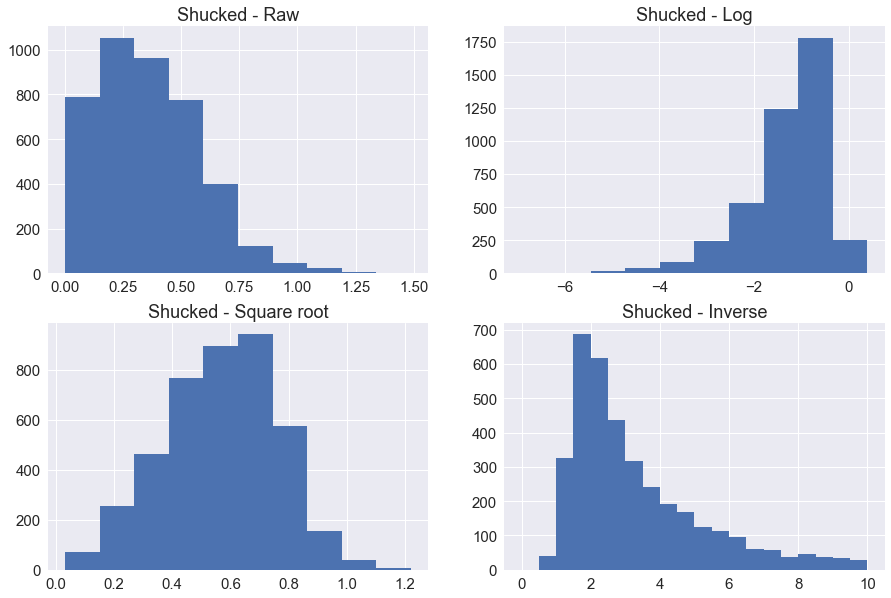

In [56]:
#check various transformations of Shucked
fig = plt.figure()
plt.rcParams["figure.figsize"] = (15,10)

fig.add_subplot(221)
plt.hist(fish['Shucked'].dropna())
plt.title('Shucked - Raw')

fig.add_subplot(222)
plt.hist(np.log(fish['Shucked'].dropna()))
plt.title('Shucked - Log')

fig.add_subplot(223)
plt.hist(np.sqrt(fish['Shucked'].dropna()))
plt.title('Shucked - Square root')

fig.add_subplot(224)
plt.hist((1/fish['Shucked'].dropna()),range =(0,10),bins=20)
plt.title('Shucked - Inverse')
plt.show()

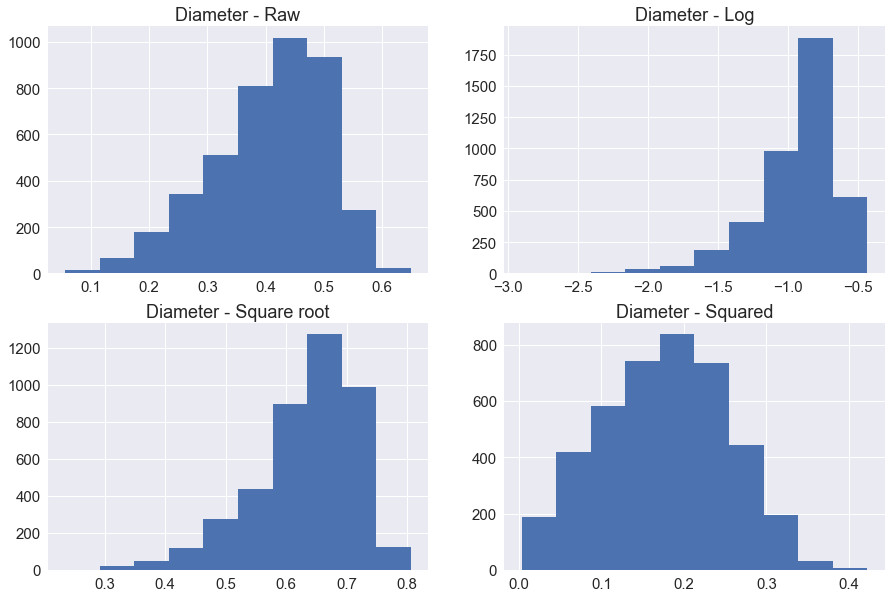

In [57]:
#Diameter
fig = plt.figure()
plt.rcParams["figure.figsize"] = (15,10)

fig.add_subplot(221)
plt.hist(fish['Diameter'].dropna())
plt.title('Diameter - Raw')

fig.add_subplot(222)
plt.hist(np.log(fish['Diameter'].dropna()))
plt.title('Diameter - Log')

fig.add_subplot(223)
plt.hist(np.sqrt(fish['Diameter'].dropna()))
plt.title('Diameter - Square root')

fig.add_subplot(224)
plt.hist((fish['Diameter']*fish['Diameter']))
plt.title('Diameter - Squared')
plt.show()

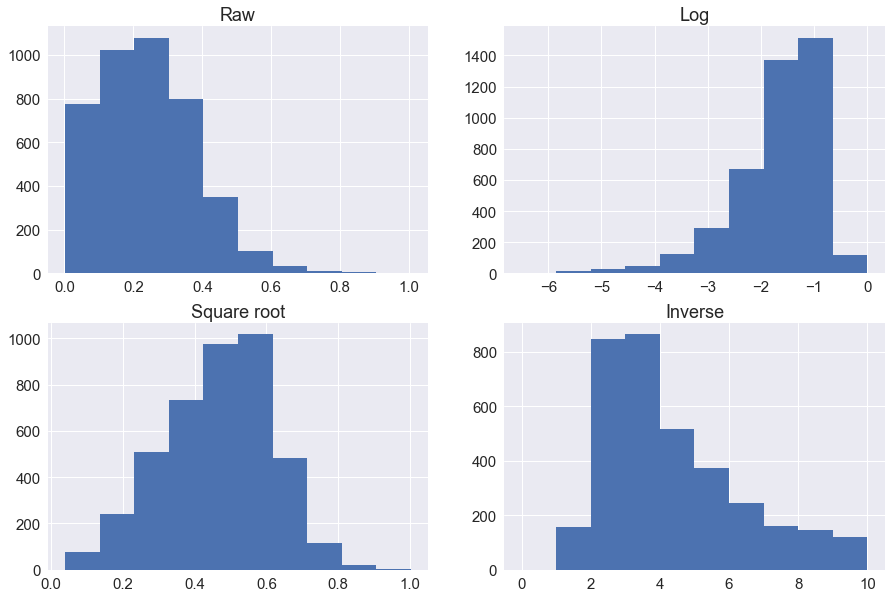

In [58]:
#Shell
fig = plt.figure()
plt.rcParams["figure.figsize"] = (15,10)

fig.add_subplot(221)
plt.hist(fish['Shell'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(fish['Shell'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(fish['Shell'].dropna()))
plt.title('Square root')

fig.add_subplot(224)
plt.hist((1/fish['Shell'].dropna()),range =(0,10),bins=10)
plt.title('Inverse')
plt.show()

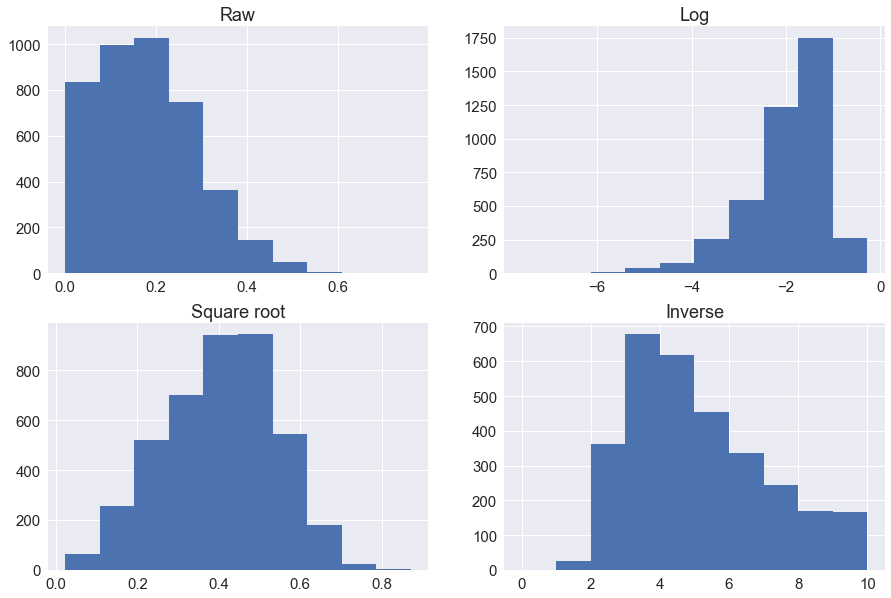

In [59]:
#Viscera
fig = plt.figure()
plt.rcParams["figure.figsize"] = (15,10)

fig.add_subplot(221)
plt.hist(fish['Viscera'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(fish['Viscera'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(fish['Viscera'].dropna()))
plt.title('Square root')

fig.add_subplot(224)
plt.hist((1/fish['Viscera'].dropna()),range =(0,10),bins=10)
plt.title('Inverse')
plt.show()

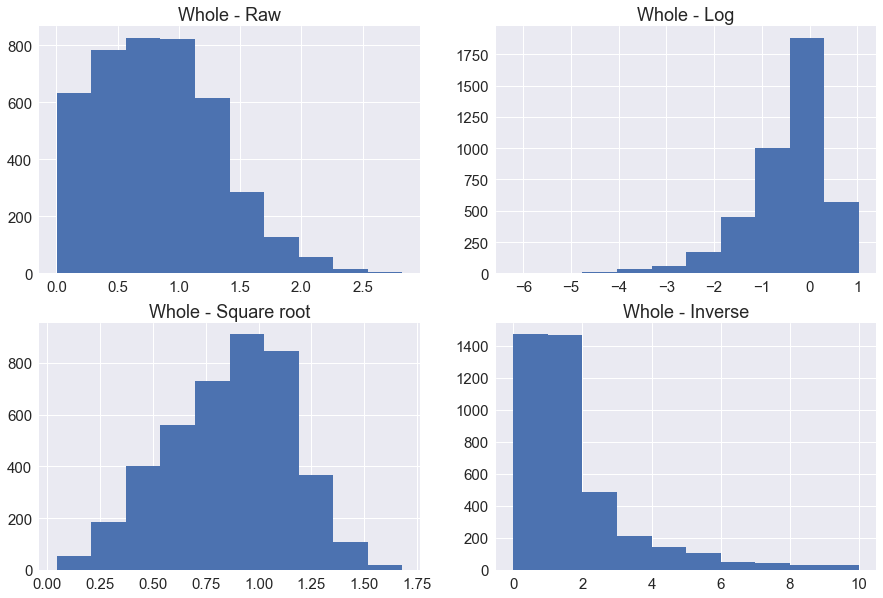

In [60]:
#Whole
fig = plt.figure()
plt.rcParams["figure.figsize"] = (15,10)

fig.add_subplot(221)
plt.hist(fish['Whole'].dropna())
plt.title('Whole - Raw')

fig.add_subplot(222)
plt.hist(np.log(fish['Whole'].dropna()))
plt.title('Whole - Log')

fig.add_subplot(223)
plt.hist(np.sqrt(fish['Whole'].dropna()))
plt.title('Whole - Square root')

fig.add_subplot(224)
plt.hist((1/fish['Whole'].dropna()),range =(0,10),bins=10)
plt.title('Whole - Inverse')
plt.show()

Looks like square root might work for almost all except diameter and height. For diameter, we are going to square it, and going to leave Height as is.

In [23]:
fish2= fish.copy()

In [24]:
fish2['Whole_sqrt'] = np.sqrt(fish2['Whole'])
fish2['Viscera_sqrt'] = np.sqrt(fish2['Viscera'])
fish2['Shell_sqrt'] = np.sqrt(fish2['Shell'])
fish2['Shucked_sqrt'] = np.sqrt(fish2['Shucked'])
fish2['Diameter_squared'] = fish2['Diameter'] * fish2['Diameter']

In [25]:
corrmat = fish2.corr()

corrmat['Rings'].sort_values(ascending=False)

Rings               1.000000
Shell_sqrt          0.648408
Shell               0.627815
Height              0.609634
Whole_sqrt          0.577280
Diameter            0.574792
Length              0.556827
Diameter_squared    0.556160
Viscera_sqrt        0.549052
Whole               0.540859
Viscera             0.504234
Shucked_sqrt        0.477065
Shucked             0.421442
Name: Rings, dtype: float64

# Modeling Take 2 - Feature Transformations

I am going to try some of the models I used prior, with the new features I created. 

In [26]:
dummies2 = pd.get_dummies(fish2['Sex'])

In [27]:
features2 = pd.concat([dummies2, fish2], axis =1, join_axes=[dummies2.index])


In [28]:
#removing Female and Male indicators
feats2 = features2.drop(['Sex','Rings','F','M'],1)
#independent
X2 = feats2
# Dependent variable
Y2 = features2['Rings']

## Linear Take 2

In [29]:
#create train test split
X_train2, X_test2, Y_train2, Y_test2 =model_selection.train_test_split(X2,Y2, test_size=0.20, random_state=42) 

#scale
scaler = StandardScaler()
X_scaled_train2 = scaler.fit_transform(X_train2, Y_train2)

X_scaled_test2  = scaler.transform(X_test2)

#instantiate and fit model
regr2 = linear_model.LinearRegression()
regr2.fit(X_scaled_train2, Y_train2)

print('\nThe R2 for train set: {:.3f}'.format(regr2.score(X_scaled_train2, Y_train2)))
print('The R2 for test set: {:.3f}'.format(regr2.score(X_scaled_test2, Y_test2)))

#variance explained - R2
predictions_linear2 = cross_val_predict(regr2, X2, Y2, cv=kf)

r2_linear2 = r2_score(Y2,predictions_linear2)
print('Cross Val Predict R2: {:.3F}'.format(r2_linear2))

#Calculate RMSE
actual_linear2 = Y2

mse_linear2 = mean_squared_error(actual_linear2, predictions_linear2)
rmse_linear2 = np.sqrt(mse_linear2)
print('RMSE: {:.3f}'.format(rmse_linear2))


The R2 for train set: 0.558
The R2 for test set: 0.592
Cross Val Predict R2: 0.559
RMSE: 2.140


## RF Take 2

In [71]:
param_search = [{'n_estimators': [200,300, 400, 500],
          'max_depth': [5,6,8,10],
                }]

# Initialize and fit the model.
rfr_grid = GridSearchCV(ensemble.RandomForestRegressor(), param_grid=param_search,cv=kf2)

rfr_grid.fit(X_scaled_train2,Y_train2)

print('Best Score: ', rfr_grid.best_score_)
print('Best Parameters: ', rfr_grid.best_params_)

Best Score:  0.535296070114
Best Parameters:  {'max_depth': 8, 'n_estimators': 400}


In [30]:
#instantiate and fit model
rfr2 = ensemble.RandomForestRegressor(n_estimators =400, max_depth=8)
rfr2.fit(X_scaled_train2, Y_train2)

print("\nR2 on training set: {:.3f}".format(rfr2.score(X_scaled_train2, Y_train2)))
print("R2 on test set: {:.3f}".format(rfr2.score(X_scaled_test2, Y_test2)))

predictions_rfr2 = cross_val_predict(rfr2, X2, Y2, cv=kf2)

r2_rfr2 = r2_score(Y2,predictions_rfr2)
print('Cross Val Predict R2: {:.3f}'.format(r2_rfr2))

# Calculate RMSE
actual_rfr2 = Y2

mse_rfr2 = mean_squared_error(actual_rfr2, predictions_rfr2)
rmse_rfr2 = np.sqrt(mse_rfr2)
print('RMSE: {:.3f}'.format(rmse_rfr2))


R2 on training set: 0.747
R2 on test set: 0.598
Cross Val Predict R2: 0.554
RMSE: 2.153


Unsurprisingly, my Random Forrest model is less sensitive to the types of transformations that I performed, so performance does not improve mouch. I am going to continue to create features to see if this changes performance. 
I might even want to do a feature performance calculations to use for the Random Forrest. 

## Gradient Boost Take 2

In [72]:
param_search = [{'n_estimators': [200,300, 400, 500],
          'max_depth': [3,4,5,6],
          'learning_rate': [0.05, .1, 0.2, 0.3]}]

# Initialize and fit the model.
gbr_grid = GridSearchCV(ensemble.GradientBoostingRegressor(), param_grid=param_search,cv=kf2)

gbr_grid.fit(X_scaled_train2,Y_train2)

print('Best Score: ', gbr_grid.best_score_)
print('Best Parameters: ', gbr_grid.best_params_)

Best Score:  0.523862414241
Best Parameters:  {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}


In [31]:
# Fit the model.
params = {'n_estimators': 200,
          'max_depth':3,
          'learning_rate': .05}

gbr2 = ensemble.GradientBoostingRegressor(**params)
gbr2.fit(X_scaled_train2, Y_train2)


print('\nR2 for train set: {:.3f}'.format(gbr2.score(X_scaled_train2, Y_train2)))
print('R2 for test set: {:.3f}'.format(gbr2.score(X_scaled_test2, Y_test2)))

predictions_gbr2 = cross_val_predict(gbr2, X2, Y2, cv=kf2)

r2_gbr2 = r2_score(Y2,predictions_gbr2)
print('Cross Val Predict R2: {:.3f}'.format(r2_gbr2))

# Calculate RMSE
actual_gbr2 = Y2

mse_gbr2 = mean_squared_error(actual_gbr2, predictions_gbr2)
rmse_gbr2 = np.sqrt(mse_gbr2)
print('RMSE: {:.3f}'.format(rmse_gbr2))


R2 for train set: 0.650
R2 for test set: 0.588
Cross Val Predict R2: 0.555
RMSE: 2.151


## SVM Take 2

In [73]:
param_search = [{'C': [1,20,50,100,200,400],
          'epsilon': [0.1,0.5,1,5,10],
          'kernel':['rbf','linear','poly']}]

# Initialize and fit the model.
svr_grid = GridSearchCV(SVR(), param_grid=param_search,cv=kf2)

svr_grid.fit(X_scaled_train2,Y_train2)

print('Best Score: ', svr_grid.best_score_)
print('Best Parameters: ', svr_grid.best_params_)



Best Score:  0.561151169337
Best Parameters:  {'C': 20, 'epsilon': 1, 'kernel': 'rbf'}


In [32]:
# Fit the model.
svr2 = SVR(C = 20, epsilon = 1, kernel = 'rbf')
svr2.fit(X_scaled_train2, Y_train2)


print('\nR2 for train set: {:.3f}'.format(svr2.score(X_scaled_train2, Y_train2)))
print('R2 for test set: {:.3f}'.format(svr2.score(X_scaled_test2, Y_test2)))

predictions_svr2 = cross_val_predict(svr2, X2, Y2, cv=kf2)

r2_svr2 = r2_score(Y2,predictions_svr2)
print('Cross Val Predict R2: {:.3f}'.format(r2_svr2))

# Calculate RMSE
actual_svr2 = Y2

mse_svr2 = mean_squared_error(actual_svr2, predictions_svr2)
rmse_svr2 = np.sqrt(mse_svr2)
print('RMSE: {:.3f}'.format(rmse_svr2))


R2 for train set: 0.592
R2 for test set: 0.616
Cross Val Predict R2: 0.554
RMSE: 2.153


Our SVM model seems to be worse following the additional features, in terms of the cross val predict R2 and our RMSE (although the test set accuracy is the highest). OUr Gradient Boost model performs about the same, while the RF and linear models show the most imoprovments (albeit still minimal). The linear model appears to improve the most after the features we added, which is not suprising, as this type of model is typically more sensitive to feature engineering and transformation. Let's add even more features do see how this changes things. 

# Modeling Take 3 - Additional Feature Engineering


Now, let's make a bunch of features to see how they do. 

In [33]:

fish3= fish.copy()
#I want to remove the indices where Height = 0, as that is most likely an error
fish3 = fish3.loc[(fish3['Height']!=0)]


fish3['whole_sqrt'] = np.sqrt(fish3['Whole'])
fish3['viscera_sqrt'] = np.sqrt(fish3['Viscera'])
fish3['shell_sqrt'] = np.sqrt(fish3['Shell'])
fish3['shucked_sqrt'] = np.sqrt(fish3['Shucked'])
fish3['diameter_squared'] = fish3['Diameter'] * fish3['Diameter']
fish3['length_x_diameter'] = fish3['Length'] * fish3['Diameter']
fish3['length_x_height'] = fish3['Length'] * fish3['Height']
fish3['diameter_x_height'] = fish3['Diameter'] * fish3['Height']
fish3['whole_x_height'] =fish3['Whole'] * fish3['Height']
fish3['shell_x_diameter'] = fish3['Shell'] * fish3['Diameter']
fish3['viscera_x_length'] = fish3['Viscera'] * fish3['Length']
means = fish3[['Diameter','Length']].mean(axis=0)
stds = fish3[['Diameter','Length']].std(axis=0)
fish3['Diam_leng_avg'] = ((fish3[['Diameter','Length']]-means)/stds).mean(axis=1)

means2 = fish3[['Viscera','Length']].mean(axis=0)
stds2 = fish3[['Viscera','Length']].std(axis=0)
fish3['visc_leng_avg'] = ((fish3[['Viscera','Length']]-means2)/stds2).mean(axis=1)

means3 = fish3[['Viscera','Shell','Shucked','Whole']].mean(axis=0)
stds3 = fish3[['Viscera','Shell','Shucked','Whole']].std(axis=0)
fish3['weight_avg'] = ((fish3[['Viscera','Shell','Shucked','Whole']]-means3)/stds3).mean(axis=1)


fish3['height_squared'] = fish3['Height'] * fish3['Height']
fish3['shucked_squared'] = fish3['Shucked'] * fish3['Shucked']
fish3['length_squared'] = fish3['Length'] * fish3['Length']
fish3['shell_squared'] = fish3['Shell'] * fish3['Shell']
fish3['whole_squared'] = fish3['Whole'] * fish3['Whole']
fish3['viscera_squared'] = fish3['Viscera'] * fish3['Viscera']



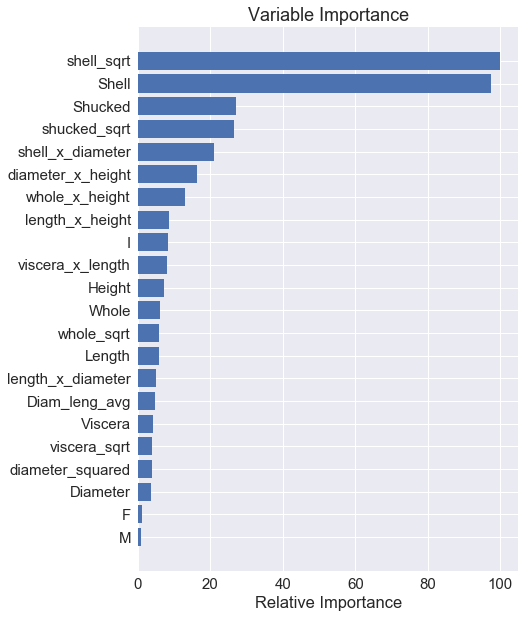

In [81]:
#now I am going to try and use feature importance to see if my performance changes. 
feature_importance = rfr3.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X3.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()


In [188]:
corrmat = fish3.corr()

corrmat['Rings'].sort_values(ascending=False)

Rings                1.000000
shell_sqrt           0.648787
Shell                0.628169
Height               0.610107
diameter_x_height    0.589618
height_squared       0.588178
shell_x_diameter     0.587319
length_x_height      0.582262
whole_sqrt           0.577042
Diameter             0.574551
Diam_leng_avg        0.567438
Length               0.556572
diameter_squared     0.555912
shell_squared        0.549760
length_x_diameter    0.548924
viscera_sqrt         0.548794
visc_leng_avg        0.543617
Whole                0.540621
length_squared       0.536648
weight_avg           0.536559
whole_x_height       0.527845
Viscera              0.503977
viscera_x_length     0.478684
shucked_sqrt         0.476778
whole_squared        0.450016
Shucked              0.421156
viscera_squared      0.403199
shucked_squared      0.310930
Name: Rings, dtype: float64

In [34]:
dummies3= pd.get_dummies(fish3['Sex'])
features3 = pd.concat([dummies3, fish3], axis =1, join_axes=[dummies3.index])
#only want to keep I indicator, as M and F does not appear to add any additional value
feats3 = features3.drop(['Sex','Rings','M','F'],1)
#independent
X3 = feats3
# Dependent variable
Y3 = features3['Rings']

## Linear Take 3

In [35]:
## create train test split - using 20%
X_train3, X_test3, Y_train3, Y_test3 =model_selection.train_test_split(X3,Y3, test_size=0.20, random_state=42) 

#scale
scaler = StandardScaler()
X_scaled_train3 = scaler.fit_transform(X_train3, Y_train3)

X_scaled_test3  = scaler.transform(X_test3)

#instantiate and fit model
regr3 = linear_model.LinearRegression()
regr3.fit(X_scaled_train3, Y_train3)

print('\nThe R2 for train set: {:.3f}'.format(regr3.score(X_scaled_train3, Y_train3)))
print('The R2 for test set: {:.3f}'.format(regr3.score(X_scaled_test3, Y_test3)))

#variance explained - R2
predictions_linear3 = cross_val_predict(regr3, X3, Y3, cv=kf2)

r2_linear3 = r2_score(Y3,predictions_linear3)
print('Cross Val Predict R2: {:.3f} '.format(r2_linear3))
      
actual_linear3 = Y3

mse_linear3 = mean_squared_error(actual_linear3, predictions_linear3)
rmse_linear3 = np.sqrt(mse_linear3)
print('RMSE: {:.3f}'.format(rmse_linear3))


The R2 for train set: 0.569
The R2 for test set: 0.593
Cross Val Predict R2: 0.568 
RMSE: 2.120


## Random Forrest Take 3

In [74]:
param_search = [{'n_estimators': [200,300, 400, 500],
          'max_depth': [5,6,8,10],
                }]


# Initialize and fit the model.
rfr_grid = GridSearchCV(ensemble.RandomForestRegressor(), param_grid=param_search,cv=kf2)

rfr_grid.fit(X_scaled_train3,Y_train3)

print('Best Score: ', rfr_grid.best_score_)
print('Best Parameters: ', rfr_grid.best_params_)

Best Score:  0.545790522098
Best Parameters:  {'max_depth': 8, 'n_estimators': 400}


In [36]:
#instantiate and fit model
rfr3 = ensemble.RandomForestRegressor(n_estimators =400, max_depth=8)
rfr3.fit(X_scaled_train3, Y_train3)

print("\nR2 on training set: {:.3f}".format(rfr3.score(X_scaled_train3, Y_train3)))
print("R2 on test set: {:.3f}".format(rfr3.score(X_scaled_test3, Y_test3)))

predictions_rfr3 = cross_val_predict(rfr3, X3, Y3, cv=kf2)

r2_rfr3 = r2_score(Y3,predictions_rfr3)
print('Cross Val Predict R2: {:.3f}'.format(r2_rfr3))

# Calculate RMSE
actual_rfr3 = Y3

mse_rfr3 = mean_squared_error(actual_rfr3, predictions_rfr3)
rmse_rfr3 = np.sqrt(mse_rfr3)
print('RMSE: {:.3f}'.format(rmse_rfr3))


R2 on training set: 0.756
R2 on test set: 0.572
Cross Val Predict R2: 0.556
RMSE: 2.149


## Gradient Boost Take 3

In [75]:
param_search = [{'n_estimators': [200,300, 400, 500],
          'max_depth': [3,4,5,6],
          'learning_rate': [0.05, .1, 0.2, 0.3]}]

# Initialize and fit the model.
gbr_grid = GridSearchCV(ensemble.GradientBoostingRegressor(), param_grid=param_search,cv=kf2)

gbr_grid.fit(X_scaled_train3,Y_train3)

print('Best Score: ', gbr_grid.best_score_)
print('Best Parameters: ', gbr_grid.best_params_)

Best Score:  0.537933789442
Best Parameters:  {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}


In [37]:
# Fit the model.
params = {'n_estimators': 200,
          'max_depth':3,
          'learning_rate': .05}


gbr3 = ensemble.GradientBoostingRegressor(**params)
gbr3.fit(X_scaled_train3, Y_train3)

print('\nR2 for train set: {:.3f}'.format(gbr3.score(X_scaled_train3, Y_train3)))
print('R2 for test set: {:.3f}'.format(gbr3.score(X_scaled_test3, Y_test3)))

predictions_gbr3 = cross_val_predict(gbr3, X3, Y3, cv=kf2)

r2_gbr3 = r2_score(Y3,predictions_gbr3)
print('Cross Val Predict R2: {:.3f}'.format(r2_gbr3))

# Calculate RMSE
actual_gbr3 = Y3

mse_gbr3 = mean_squared_error(actual_gbr3, predictions_gbr3)
rmse_gbr3 = np.sqrt(mse_gbr3)
print('RMSE: {:.3f}'.format(rmse_gbr3))


R2 for train set: 0.661
R2 for test set: 0.574
Cross Val Predict R2: 0.551
RMSE: 2.161


## SVM Take 3

In [76]:
param_search = [{'C': [1,20,50,100,200,400],
          'epsilon': [0.1,0.5,1,5,10],
          'kernel':['rbf','linear','poly']}]

# Initialize and fit the model.
svr_grid = GridSearchCV(SVR(), param_grid=param_search,cv=kf2)

svr_grid.fit(X_scaled_train3,Y_train3)

print('Best Score: ', svr_grid.best_score_)
print('Best Parameters: ', svr_grid.best_params_)



Best Score:  0.555568870619
Best Parameters:  {'C': 20, 'epsilon': 1, 'kernel': 'rbf'}


In [38]:
# Fit the model.
svr3 = SVR(C = 20, epsilon = 1, kernel = 'rbf' )
svr3.fit(X_scaled_train3, Y_train3)

print('\nR2 for train set: {:.3f}'.format(svr3.score(X_scaled_train3, Y_train3)))
print('R2 for test set: {:.3f}'.format(svr3.score(X_scaled_test3, Y_test3)))

predictions_svr3 = cross_val_predict(svr3, X3, Y3, cv=kf2)

r2_svr3 = r2_score(Y3,predictions_svr3)
print('Cross Val Predict R2: {:.3f}'.format(r2_svr3))

# Calculate RMSE
actual_svr3= Y3

mse_svr3= mean_squared_error(actual_svr3, predictions_svr3)
rmse_svr3= np.sqrt(mse_svr3)
print('RMSE: {:.3f}'.format(rmse_svr3))


R2 for train set: 0.596
R2 for test set: 0.598
Cross Val Predict R2: 0.554
RMSE: 2.153


In [189]:
lin_train_set_r2 = regr3.score(X_scaled_train3, Y_train3)
lin_test_set_r2 = regr3.score(X_scaled_test3, Y_test3)

rfr_train_set_r2 = rfr3.score(X_scaled_train3, Y_train3)
rfr_test_set_r2 = rfr3.score(X_scaled_test3, Y_test3)

gbr_train_set_r2 =gbr3.score(X_scaled_train3, Y_train3)
gbr_test_set_r2 = gbr3.score(X_scaled_test3, Y_test3)

svr_train_set_r2 =svr3.score(X_scaled_train3, Y_train3)
svr_test_set_r2 = svr3.score(X_scaled_test3, Y_test3)

In [190]:

data3 = {'Model':['Linear','Random Forest','Gradient Boost',' SVR'],\
         'Train Set R2': [lin_train_set_r2,rfr_train_set_r2, gbr_train_set_r2,svr_train_set_r2], \
         'Test Set R2':[lin_test_set_r2 ,rfr_test_set_r2, gbr_test_set_r2,svr_test_set_r2 ] ,\
         'Cross Val Predict R2':[r2_linear3, r2_rfr3, r2_gbr3, r2_svr3],\
         'RMSE':[rmse_linear3,rmse_rfr3, rmse_gbr3, rmse_svr3]}
results3 = pd.DataFrame(data = data3)
results3 = results3.set_index('Model')
results3 = results3.round(3)

In [191]:
results3
results3.to_csv('result3.csv')

OK, so our linear and Random Forest models do not seem to change much. The Gradient Model's performance declines slightly, while that of the SVM model improves slightly. 

The last thing I want to try, is to remove all outliers from fish. Then see how my performance changes/identify types of feature engineering I would like to make. 

# Modeling Take 4 - Remove Outliers

In [39]:
fish4= fish.copy()


In [40]:
corrmat = fish4.corr()

corrmat['Rings'].sort_values(ascending=False).head(20)

Rings       1.000000
Shell       0.627815
Height      0.609634
Diameter    0.574792
Length      0.556827
Whole       0.540859
Viscera     0.504234
Shucked     0.421442
Name: Rings, dtype: float64

In [41]:
dummies4 = pd.get_dummies(fish4['Sex'])
features4 = pd.concat([dummies4, fish4], axis =1, join_axes=[dummies4.index])
feats4 = features4.drop(['Sex','Rings','M','F'],1)

#independent
X4 = feats4
# Dependent variable
Y4 = features4['Rings']

In [42]:
X_train4, X_test4, Y_train4, Y_test4 = model_selection.train_test_split(X4,Y4, test_size=0.20, random_state=42) 

for col in X_train4.loc[:,'Length':]:
    q1 = X_train4[col].quantile(.25)
    q3 = X_train4[col].quantile(.75)
    iqr = q3 -q1
    Y_train4= Y_train4.loc[(X_train4[col]> (q1 -1.5*iqr)) & (X_train4[col]<(q3 + 1.5 *iqr))]
    X_train4 = X_train4.loc[(X_train4[col]> (q1 -1.5*iqr)) & (X_train4[col]<(q3 + 1.5 *iqr)),:]
   

## Linear Take 4

In [43]:

#scale
scaler4 = StandardScaler()
X_scaled_train4 = scaler4.fit_transform(X_train4, Y_train4)

X_scaled_test4  = scaler4.transform(X_test4)

#instantiate and fit model
regr4 = linear_model.LinearRegression()
regr4.fit(X_scaled_train4, Y_train4)

print('\nThe R2 for train set: {:.3f}'.format(regr4.score(X_scaled_train4, Y_train4)))
print('The R2 for test set: {:.3f}'.format(regr4.score(X_scaled_test4, Y_test4)))

prediction_lin4 = regr4.predict(X_scaled_test4)
actual_linear4 = Y_test4

mse_linear4 = mean_squared_error(actual_linear4, prediction_lin4)
rmse_linear4 = np.sqrt(mse_linear4)
print('RMSE: {:.3f}'.format(rmse_linear4))


The R2 for train set: 0.516
The R2 for test set: 0.582
RMSE: 2.186


In [119]:
Y_test4.shape

(835,)

## Random Forrest Take 4

In [107]:
param_search = [{'n_estimators': [200,300, 400, 500],
          'max_depth': [5,6,8,10],
                }]


# Initialize and fit the model.
rfr_grid = GridSearchCV(ensemble.RandomForestRegressor(), param_grid=param_search,cv=kf2)

rfr_grid.fit(X_scaled_train4,Y_train4)

print('Best Score: ', rfr_grid.best_score_)
print('Best Parameters: ', rfr_grid.best_params_)

Best Score:  0.512123746387
Best Parameters:  {'max_depth': 8, 'n_estimators': 500}


In [44]:
#instantiate and fit model
rfr4 = ensemble.RandomForestRegressor(n_estimators =500, max_depth=8)
rfr4.fit(X_scaled_train4, Y_train4)

print("\nR2 on training set: {:.3f}".format(rfr4.score(X_scaled_train4, Y_train4)))
print("R2 on test set: {:.3f}".format(rfr4.score(X_scaled_test4, Y_test4)))

predictions_rfr4 = rfr4.predict(X_scaled_test4)
actual_rfr4 = Y_test4

mse_rfr4 = mean_squared_error(actual_rfr4, predictions_rfr4)
rmse_rfr4= np.sqrt(mse_rfr4)
print('RMSE: {:.3f}'.format(rmse_rfr4))


R2 on training set: 0.739
R2 on test set: 0.596
RMSE: 2.149


In [118]:
X_scaled_test4.shape

(835, 8)

Interestingly, my R2 values of my linear model are now lower, however, my RMSE is lower, and much lower than that of our baseline score. My Random Forest now performs better than my linear model, although the R2 scores are slightly worse than before (but with a lower RMSE as well). 

## Gradient Boost Take 4

In [108]:
param_search = [{'n_estimators': [200,300, 400, 500],
          'max_depth': [3,4,5,6],
          'learning_rate': [0.05, .1, 0.2, 0.3]}]

# Initialize and fit the model.
gbr_grid = GridSearchCV(ensemble.GradientBoostingRegressor(), param_grid=param_search,cv=kf2)

gbr_grid.fit(X_scaled_train4,Y_train4)

print('Best Score: ', gbr_grid.best_score_)
print('Best Parameters: ', gbr_grid.best_params_)

Best Score:  0.500125313051
Best Parameters:  {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}


In [46]:
# Fit the model.
params = {'n_estimators': 200,
          'max_depth':3,
          'learning_rate': .05}


gbr4 = ensemble.GradientBoostingRegressor(**params)
gbr4.fit(X_scaled_train4, Y_train4)

print('\nR2 for train set: {:.3f}'.format(gbr4.score(X_scaled_train4, Y_train4)))
print('R2 for test set: {:.3f}'.format(gbr4.score(X_scaled_test4, Y_test4)))

predictions_gbr4 = gbr4.predict(X_scaled_test4)
actual_gbr4 = Y_test4

mse_gbr4 = mean_squared_error(actual_gbr4, predictions_gbr4)
rmse_gbr4 = np.sqrt(mse_gbr4)
print('RMSE: {:.3f}'.format(rmse_gbr4))


R2 for train set: 0.628
R2 for test set: 0.581
RMSE: 2.187


## SVM Take 4

In [110]:
param_search = [{'C': [1,20,50,100,200,400],
          'epsilon': [0.1,0.5,1,5,10],
          'kernel':['rbf','linear','poly']}]

# Initialize and fit the model.
svr_grid = GridSearchCV(SVR(), param_grid=param_search,cv=kf2)

svr_grid.fit(X_scaled_train4,Y_train4)

print('Best Score: ', svr_grid.best_score_)
print('Best Parameters: ', svr_grid.best_params_)



In [47]:
# Fit the model.
svr4 = SVR(C = 20, epsilon = 1, kernel ='rbf')
svr4.fit(X_scaled_train4, Y_train4)

print('\nR2 for train set: {:.3f}'.format(svr4.score(X_scaled_train4, Y_train4)))
print('R2 for test set: {:.3f}'.format(svr4.score(X_scaled_test4, Y_test4)))

predictions_svr4 = svr4.predict(X_scaled_test4)
actual_svr4 = Y_test4

mse_svr4= mean_squared_error(actual_svr4, predictions_svr4)
rmse_svr4= np.sqrt(mse_svr4)
print('RMSE: {:.3f}'.format(rmse_svr4))


R2 for train set: 0.572
R2 for test set: 0.611
RMSE: 2.108


Same with the GB and SVM models, decline in R2 score but improved RMSE. 
Now I want to add back some features to see if that changes anthing. 

# Modeling Take 5 - Remove Outliers with Additional Features

In [48]:
fish5= fish.copy()


fish5['whole_sqrt'] = np.sqrt(fish5['Whole'])
# # fish5['viscera_sqrt'] = np.sqrt(fish5['Viscera'])
fish5['shell_sqrt'] = np.sqrt(fish5['Shell'])
# # fish5['shucked_sqrt'] = np.sqrt(fish5['Shucked'])
fish5['diameter_squared'] = fish5['Diameter'] * fish5['Diameter']
fish5['length_x_diameter'] = fish5['Length'] * fish5['Diameter']
fish5['length_x_height'] = fish5['Length'] * fish5['Height']
fish5['diameter_x_height'] = fish5['Diameter'] * fish5['Height']
fish5['whole_x_height'] =fish5['Whole'] * fish5['Height']
fish5['shell_x_diameter'] = fish5['Shell'] * fish5['Diameter']
fish5['viscera_x_length'] = fish5['Viscera'] * fish5['Length']

means = fish5[['Diameter','Length']].mean(axis=0)
stds = fish5[['Diameter','Length']].std(axis=0)
fish5['Diam_leng_avg'] = ((fish5[['Diameter','Length']]-means)/stds).mean(axis=1)

# means2 = fish5[['Viscera','Length']].mean(axis=0)
# stds2 = fish5[['Viscera','Length']].std(axis=0)
# fish5['visc_leng_avg'] = ((fish5[['Viscera','Length']]-means2)/stds2).mean(axis=1)

# means3 = fish5[['Viscera','Shell','Shucked','Whole']].mean(axis=0)
# stds3 = fish5[['Viscera','Shell','Shucked','Whole']].std(axis=0)
# fish5['weight_avg'] = ((fish5[['Viscera','Shell','Shucked','Whole']]-means3)/stds3).mean(axis=1)

fish5['height_squared'] = fish5['Height'] * fish5['Height']
fish5['shucked_squared'] = fish5['Shucked'] * fish5['Shucked']
fish5['length_squared'] = fish5['Length'] * fish5['Length']
fish5['shell_squared'] = fish5['Shell'] * fish5['Shell']
fish5['whole_squared'] = fish5['Whole'] * fish5['Whole']
fish5['viscera_squared'] = fish5['Viscera'] * fish5['Viscera']


In [396]:
corrmat = fish5.corr()

corrmat['Rings'].sort_values(ascending=False)

Rings                1.000000
shell_sqrt           0.648408
Shell                0.627815
Height               0.609634
diameter_x_height    0.589763
height_squared       0.588358
shell_x_diameter     0.587358
length_x_height      0.582406
whole_sqrt           0.577280
Diameter             0.574792
Diam_leng_avg        0.567686
Length               0.556827
diameter_squared     0.556160
shell_squared        0.549526
length_x_diameter    0.549178
Whole                0.540859
length_squared       0.536910
whole_x_height       0.528081
Viscera              0.504234
viscera_x_length     0.478932
whole_squared        0.450217
Shucked              0.421442
viscera_squared      0.403413
shucked_squared      0.311160
Name: Rings, dtype: float64

In [49]:
dummies5 = pd.get_dummies(fish5['Sex'])
features5 = pd.concat([dummies5, fish5], axis =1, join_axes=[dummies5.index])

feats5 = features5.drop(['Sex','Rings','M','F'],1)

#independent
X5 = feats5
# Dependent variable
Y5 = features5['Rings']

In [398]:
dummies5= pd.get_dummies(fish5['Sex'])
features5 = pd.concat([dummies5, fish5], axis =1, join_axes=[dummies5.index])
#only want to keep I indicator, as M and F does not appear to add any additional value
feats5 = features5.drop(['Sex','Rings','M','F'],1)
#independent - top 10 features 
# X5 = feats5.drop(['Viscera','Shucked'],1)
# X5 = feats5
# Dependent variable
Y5 = features5['Rings']

In [50]:
X_train5, X_test5, Y_train5, Y_test5 = model_selection.train_test_split(X5,Y5, test_size=0.20, random_state=42) 



In [51]:
X_train5.head()

,I,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,whole_sqrt,shell_sqrt,...,whole_x_height,shell_x_diameter,viscera_x_length,Diam_leng_avg,height_squared,shucked_squared,length_squared,shell_squared,whole_squared,viscera_squared
1272,1,0.500,0.370,0.120,0.5445,0.2490,0.1065,0.152,0.737902,0.389872,...,0.065340,0.056240,0.053250,-0.290535,0.014400,0.062001,0.250000,0.023104,0.296480,0.011342
1745,0,0.490,0.375,0.135,0.6125,0.2555,0.1020,0.220,0.782624,0.469042,...,0.082688,0.082500,0.049980,-0.306978,0.018225,0.065280,0.240100,0.048400,0.375156,0.010404
2517,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.296,1.046184,0.544059,...,0.164175,0.143560,0.163125,0.809393,0.022500,0.281961,0.390625,0.087616,1.197930,0.068121
1281,1,0.510,0.405,0.120,0.6100,0.2290,0.1310,0.235,0.781025,0.484768,...,0.073200,0.095175,0.066810,-0.072540,0.014400,0.052441,0.260100,0.055225,0.372100,0.017161
3695,0,0.595,0.495,0.185,1.2850,0.4160,0.2240,0.485,1.133578,0.696419,...,0.237725,0.240075,0.133280,0.734868,0.034225,0.173056,0.354025,0.235225,1.651225,0.050176


In [52]:

for col in X_train5.loc[:,'Length':'whole_sqrt']:
    q1 = X_train5[col].quantile(.25)
    q3 = X_train5[col].quantile(.75)
    iqr = q3 -q1
    Y_train5= Y_train5.loc[(X_train5[col]> (q1 -1.5*iqr)) & (X_train5[col]<(q3 + 1.5 *iqr))]
    X_train5 = X_train5.loc[(X_train5[col]> (q1 -1.5*iqr)) & (X_train5[col]<(q3 + 1.5 *iqr)),:]
   

## Linear Take 5

In [53]:
## create train test split - using 20%


#scale
scaler5 = StandardScaler()
X_scaled_train5 = scaler5.fit_transform(X_train5, Y_train5)

X_scaled_test5 = scaler5.transform(X_test5)

#instantiate and fit model
regr5 = linear_model.LinearRegression()
regr5.fit(X_scaled_train5, Y_train5)

print('\nThe R2 for train set: {:.3f}'.format(regr5.score(X_scaled_train5, Y_train5)))
print('The R2 for test set: {:.3f}'.format(regr5.score(X_scaled_test5, Y_test5)))

predictions_lin5 = regr5.predict(X_scaled_test5)
actual_linear5 = Y_test5


mse_linear5 = mean_squared_error(actual_linear5, predictions_lin5)
rmse_linear5 = np.sqrt(mse_linear5)
print('RMSE: {:.3f}'.format(rmse_linear5))


The R2 for train set: 0.544
The R2 for test set: 0.604
RMSE: 2.128


In [140]:
X_scaled_train5.shape

(3218, 26)

## Random Forrest Take 5

In [171]:
param_search = [{'n_estimators': [200,300, 400, 500],
          'max_depth': [5,6,8,10],
                }]

# Initialize and fit the model.
rfr_grid = GridSearchCV(ensemble.RandomForestRegressor(), param_grid=param_search,cv=kf2)

rfr_grid.fit(X_scaled_train5,Y_train5)

print('Best Score: ', rfr_grid.best_score_)
print('Best Parameters: ', rfr_grid.best_params_)

Best Score:  0.514112420852
Best Parameters:  {'max_depth': 8, 'n_estimators': 200}


In [54]:
#instantiate and fit model
rfr5 = ensemble.RandomForestRegressor(n_estimators =200, max_depth=8)
rfr5.fit(X_scaled_train5, Y_train5)

print("\nR2 on training set: {:.3f}".format(rfr5.score(X_scaled_train5, Y_train5)))
print("R2 on test set: {:.3f}".format(rfr5.score(X_scaled_test5, Y_test5)))

predictions_rfr5 = rfr5.predict(X_scaled_test5)
actual_rfr5 = Y_test5

mse_rfr5 = mean_squared_error(actual_rfr5, predictions_rfr5)
rmse_rfr5= np.sqrt(mse_rfr5)
print('RMSE: {:.3f}'.format(rmse_rfr5))


R2 on training set: 0.752
R2 on test set: 0.593
RMSE: 2.158


## Gradient Boost Take 5

In [173]:
param_search = [{'n_estimators': [200,300, 400, 500],
          'max_depth': [3,4,5,6],
          'learning_rate': [0.05, .1, 0.2, 0.3]}]

# Initialize and fit the model.
gbr_grid = GridSearchCV(ensemble.GradientBoostingRegressor(), param_grid=param_search,cv=kf2)

gbr_grid.fit(X_scaled_train5,Y_train5)

print('Best Score: ', gbr_grid.best_score_)
print('Best Parameters: ', gbr_grid.best_params_)

Best Score:  0.50969491523
Best Parameters:  {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}


In [55]:
# Fit the model.
params = {'n_estimators': 200,
          'max_depth':4,
          'learning_rate': .05}


gbr5 = ensemble.GradientBoostingRegressor(**params)
gbr5.fit(X_scaled_train5, Y_train5)


print('\nR2 for train set: {:.3f}'.format(gbr5.score(X_scaled_train5, Y_train5)))
print('R2 for test set: {:.3f}'.format(gbr5.score(X_scaled_test5, Y_test5)))

predictions_gbr5 = gbr5.predict(X_scaled_test5)
actual_gbr5 = Y_test5

mse_gbr5 = mean_squared_error(actual_gbr5, predictions_gbr5)
rmse_gbr5 = np.sqrt(mse_gbr5)
print('RMSE: {:.3f}'.format(rmse_gbr5))


R2 for train set: 0.718
R2 for test set: 0.591
RMSE: 2.161


## SVM Take 5

In [ ]:
param_search = [{'C': [1,20,50,100,200,400],
          'epsilon': [0.1,0.5,1,5,10],
          'kernel':['rbf','linear','poly']}]

# Initialize and fit the model.
svr_grid = GridSearchCV(SVR(), param_grid=param_search,cv=kf2)

svr_grid.fit(X_scaled_train5,Y_train5)

print('Best Score: ', svr_grid.best_score_)
print('Best Parameters: ', svr_grid.best_params_)



In [56]:
# Fit the model.
svr5 = SVR(C = 20, epsilon = 1, kernel ='rbf')
svr5.fit(X_scaled_train5, Y_train5)

print('\nR2 for train set: {:.3f}'.format(svr5.score(X_scaled_train5, Y_train5)))
print('R2 for test set: {:.3f}'.format(svr5.score(X_scaled_test5, Y_test5)))

predictions_svr5 = svr5.predict(X_scaled_test5)
actual_svr5 = Y_test5

mse_svr5= mean_squared_error(actual_svr5, predictions_svr5)
rmse_svr5= np.sqrt(mse_svr5)
print('RMSE: {:.3f}'.format(rmse_svr5))


R2 for train set: 0.574
R2 for test set: 0.593
RMSE: 2.157


This did not seem to do much. Linear improved by the most, but again, the performance of all models is pretty similar. The train set R2 scores for the linear and SVM models are also closest to that of the test set R2 scores, meaning there is likely less overfitting happening in these two models. 

In [410]:
lin_train_set_r2 = regr5.score(X_scaled_train5, Y_train5)
lin_test_set_r2 = regr5.score(X_scaled_test5, Y_test5)

rfr_train_set_r2 = rfr5.score(X_scaled_train5, Y_train5)
rfr_test_set_r2 = rfr5.score(X_scaled_test5, Y_test5)

gbr_train_set_r2 =gbr5.score(X_scaled_train5, Y_train5)
gbr_test_set_r2 = gbr5.score(X_scaled_test5, Y_test5)

svr_train_set_r2 =svr5.score(X_scaled_train5, Y_train5)
svr_test_set_r2 = svr5.score(X_scaled_test5, Y_test5)

In [ ]:

data5 = {'Model':['Linear','Random Forest','Gradient Boost',' SVR'],\
         'Train Set R2': [lin_train_set_r2,rfr_train_set_r2,gbr_train_set_r2,svr_train_set_r2], \
         'Test Set R2':[lin_test_set_r2 ,rfr_test_set_r2,gbr_test_set_r2,svr_test_set_r2 ],\
         'RMSE':[rmse_linear5,rmse_rfr5,rmse_gbr5, rmse_svr5] }
results5 = pd.DataFrame(data = data5)
results5 = results5.set_index('Model')

In [412]:
results5 = results5.round(3)
results5.to_csv('results6.csv')

(0.5, 0.61)

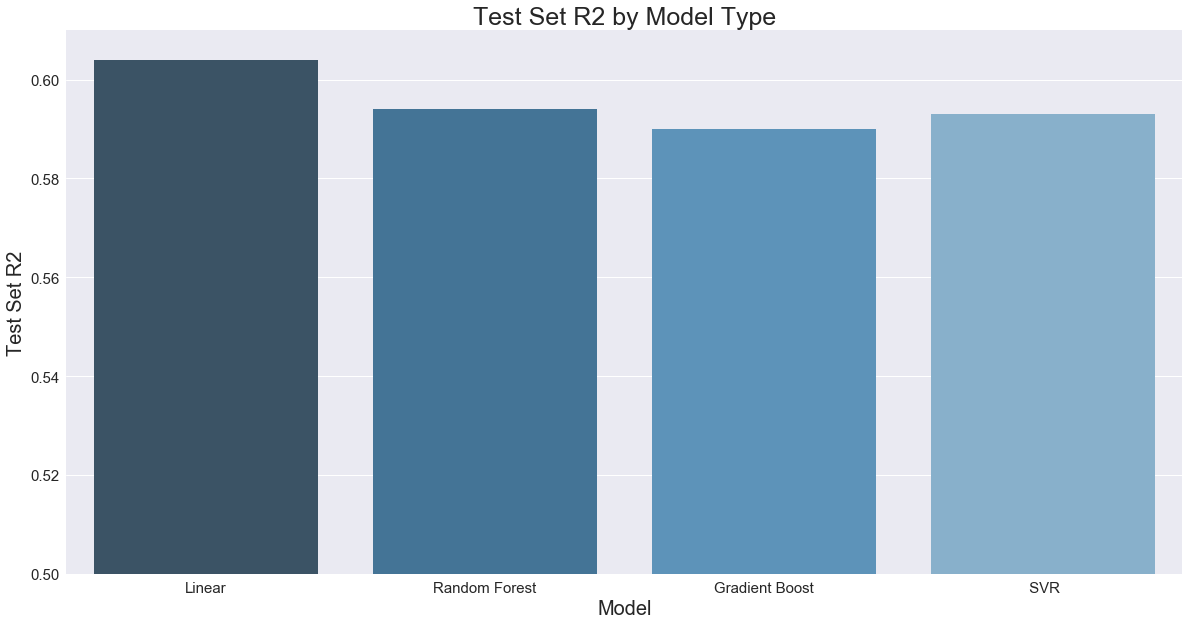

In [423]:
plt.figure(figsize=(20,10))
indices = results5.index

sns.barplot(indices,results5['Test Set R2'],palette='Blues_d')
plt.title('Test Set R2 by Model Type', fontsize=25)
plt.ylabel('Test Set R2',fontsize =20)
plt.xlabel('Model',fontsize =20)
plt.ylim((.5,.61))

(0.45, 0.8)

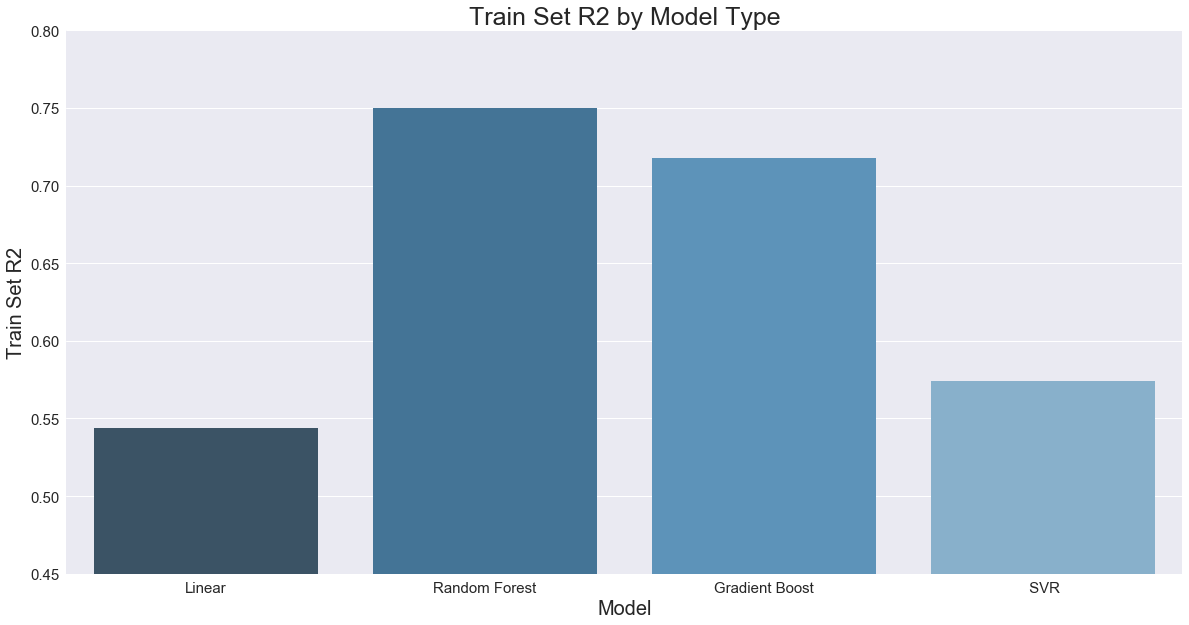

In [424]:
plt.figure(figsize=(20,10))
indices = results5.index

sns.barplot(indices,results5['Train Set R2'],palette='Blues_d')
plt.title('Train Set R2 by Model Type', fontsize=25)
plt.ylabel('Train Set R2',fontsize =20)
plt.xlabel('Model',fontsize =20)
plt.ylim((.45,.8))

(2, 2.24)

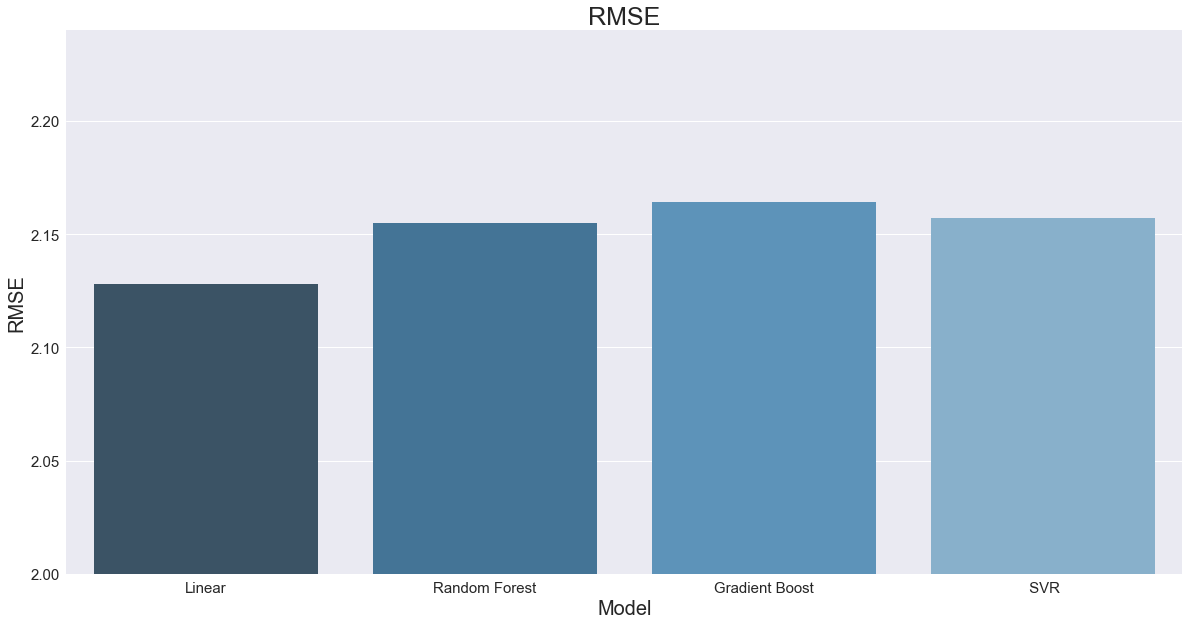

In [416]:
plt.figure(figsize=(20,10))
indices = results5.index

sns.barplot(indices,results5['RMSE'],palette='Blues_d')
plt.title('RMSE', fontsize=25)
plt.ylabel('RMSE',fontsize =20)
plt.xlabel('Model',fontsize =20)
plt.ylim((2,2.24))

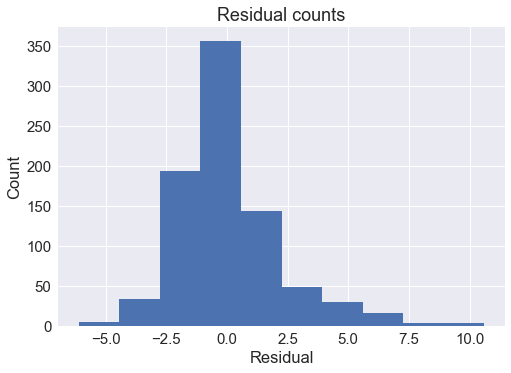

In [417]:
predicted = predictions_rfr5
actual = Y_test5
residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

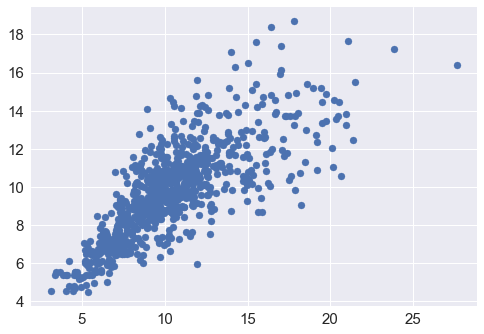

In [418]:
jitter = np.random.random(size = np.array(Y_test5).shape) 
plt.scatter(np.array(Y_test5) + jitter ,predictions_rfr5)
plt.show()

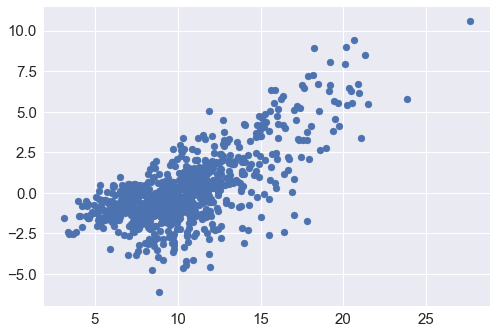

In [419]:
plt.scatter(np.array(Y_test5) + jitter ,residual)
plt.show()

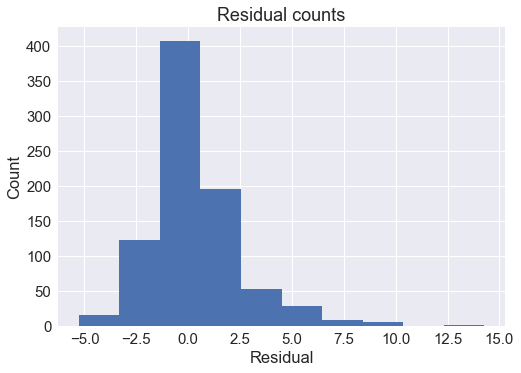

In [77]:
predicted = predictions_svr5
actual = Y_test5
residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

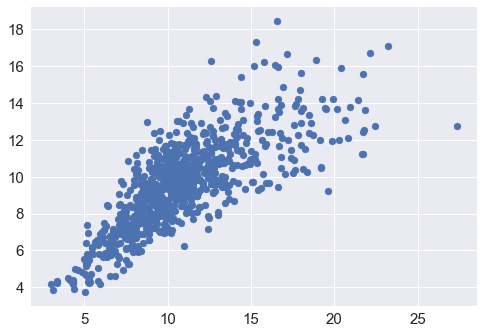

In [78]:
jitter = np.random.random(size = np.array(Y_test5).shape) * 2
plt.scatter(np.array(Y_test5) + jitter ,predictions_svr5)
plt.show()

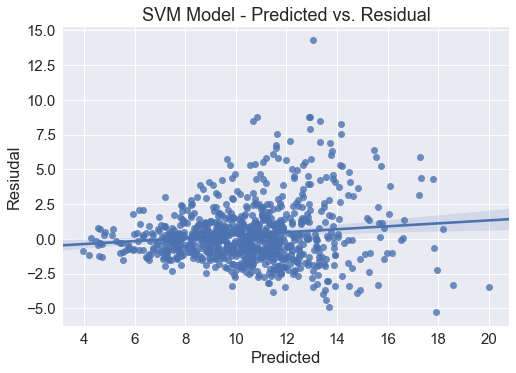

In [79]:
sns.regplot(predicted + jitter ,residual)
plt.title('SVM Model - Predicted vs. Residual')
plt.xlabel('Predicted')
plt.ylabel('Resiudal')
plt.show()
plt.show()

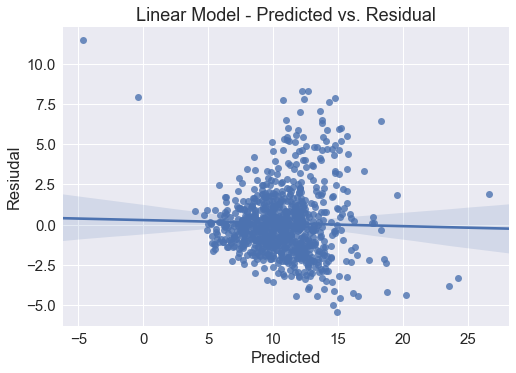

In [75]:
predictions_lin5 = regr5.predict(X_scaled_test5)
predicted = predictions_lin5 
actual = Y_test5
residual = actual - predicted

# jitter = np.random.random(size = np.array(Y_test5).shape) * 2
# plt.scatter(np.array(Y_test5) + jitter ,predictions_lin5  )
# plt.show()

# plt.hist(residual)
# plt.title('Residual counts')
# plt.xlabel('Residual')
# plt.ylabel('Count')
# plt.show()
sns.regplot(predictions_lin5  + jitter ,residual)

plt.title('Linear Model - Predicted vs. Residual')
plt.xlabel('Predicted')
plt.ylabel('Resiudal')
plt.show()